In [16]:
import pandas as pd
import numpy as np
import glob
import os

# read the data C:\Users\makumarm\Documents\ResearchWork\EdgeAI_IISC\Project\Hackthon\guardian-edge\Data
folder_path = r"C:\Users\makumarm\Documents\ResearchWork\EdgeAI_IISC\Project\Hackthon\guardian-edge\Data"
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

print(f"Found {len(csv_files)} CSV files in the folder:")
for file in csv_files:
    print(f"  - {os.path.basename(file)}")

# Read all CSV files into a list of DataFrames
all_dataframes_A = [pd.read_csv(file) for file in csv_files if 'device_A' in os.path.basename(file)]
all_dataframes_B = [pd.read_csv(file) for file in csv_files if 'device_B' in os.path.basename(file)]

if all_dataframes_A:
    print(all_dataframes_A[0].head())
else:
    print("No Device A files found")
# For device A data add an extra column as device type as A
for df in all_dataframes_A:
    df['DeviceType'] = 'A'
# For device B data add an extra column as device type as B
for df in all_dataframes_B:
    df['DeviceType'] = 'B'

# Display summary
print(f"\nDevice A: {len(all_dataframes_A)} files loaded.")
print(f"Device B: {len(all_dataframes_B)} files loaded.")

print(all_dataframes_A[0].head())
print(all_dataframes_B[0].head())

Found 4 CSV files in the folder:
  - device_A_window_diff_stats.csv
  - device_B_window_diff_stats.csv
  - falling_device_A_stats.csv
  - falling_device_B_stats.csv
   diff_window_id    ax_max    ax_min   ax_mean    ay_max    ay_min   ay_mean  \
0               0  0.013916 -0.011597 -0.000347  0.073853 -0.062378 -0.002838   
1               1  0.017212 -0.013916  0.000126  0.094360 -0.081054 -0.000214   
2               2  0.017212 -0.013916  0.000919  0.094360 -0.081054  0.004333   
3               3  0.017212 -0.027222 -0.000272  0.098755 -0.145874 -0.000952   
4               4  0.017212 -0.027222  0.000371  0.098755 -0.145874  0.002120   

     az_max    az_min   az_mean    gx_max    gx_min   gx_mean    gy_max  \
0  0.057129 -0.045410  0.002910  1.098634 -1.953126 -0.042419  2.685547   
1  0.066162 -0.058594  0.000488  1.464844 -1.953126  0.013428  2.685547   
2  0.066162 -0.058594  0.000138  1.464844 -1.953126  0.032043  2.685547   
3  0.066162 -0.058594 -0.001726  1.464844 -1.953

In [17]:
# Concatenate device A and device B dataframes side by side (as extra columns)
# Merge corresponding Device A and Device B files horizontally

if len(all_dataframes_A) != len(all_dataframes_B):
    print(f"Warning: Mismatch in number of files - Device A: {len(all_dataframes_A)}, Device B: {len(all_dataframes_B)}")

# Concatenate all Device A dataframes vertically
df_A_combined = pd.concat(all_dataframes_A, ignore_index=True)
print(f"Device A combined shape: {df_A_combined.shape}")

# Concatenate all Device B dataframes vertically
df_B_combined = pd.concat(all_dataframes_B, ignore_index=True)
print(f"Device B combined shape: {df_B_combined.shape}")

# Remove DeviceType column if needed before merging to avoid duplication
if 'DeviceType' in df_B_combined.columns:
    df_B_combined = df_B_combined.drop(columns=['DeviceType'])

# Add suffix to distinguish Device A and Device B columns
df_combined = pd.concat([df_A_combined, df_B_combined], axis=1, keys=['DeviceA', 'DeviceB'])

# Flatten the multi-level column names
df_combined.columns = ['_'.join(col).strip('_') if col[1] else col[0] for col in df_combined.columns]

print(f"\nCombined dataframe shape: {df_combined.shape}")
print(f"Columns: {df_combined.columns.tolist()}")
print(f"\nFirst few rows:")
print(df_combined.head())


Device A combined shape: (138, 22)
Device B combined shape: (138, 22)

Combined dataframe shape: (138, 43)
Columns: ['DeviceA_diff_window_id', 'DeviceA_ax_max', 'DeviceA_ax_min', 'DeviceA_ax_mean', 'DeviceA_ay_max', 'DeviceA_ay_min', 'DeviceA_ay_mean', 'DeviceA_az_max', 'DeviceA_az_min', 'DeviceA_az_mean', 'DeviceA_gx_max', 'DeviceA_gx_min', 'DeviceA_gx_mean', 'DeviceA_gy_max', 'DeviceA_gy_min', 'DeviceA_gy_mean', 'DeviceA_gz_max', 'DeviceA_gz_min', 'DeviceA_gz_mean', 'DeviceA_activity', 'DeviceA_DeviceType', 'DeviceA_file_id', 'DeviceB_diff_window_id', 'DeviceB_ax_max', 'DeviceB_ax_min', 'DeviceB_ax_mean', 'DeviceB_ay_max', 'DeviceB_ay_min', 'DeviceB_ay_mean', 'DeviceB_az_max', 'DeviceB_az_min', 'DeviceB_az_mean', 'DeviceB_gx_max', 'DeviceB_gx_min', 'DeviceB_gx_mean', 'DeviceB_gy_max', 'DeviceB_gy_min', 'DeviceB_gy_mean', 'DeviceB_gz_max', 'DeviceB_gz_min', 'DeviceB_gz_mean', 'DeviceB_activity', 'DeviceB_file_id']

First few rows:
   DeviceA_diff_window_id  DeviceA_ax_max  DeviceA_ax_

In [18]:
# Create a combined dataframe with structure:
# window_id | Device A (18 cols: max, min, mean for 6 sensors) | Device B (18 cols) | activity

# Concatenate all Device A files vertically
df_A_combined = pd.concat(all_dataframes_A, ignore_index=True)
print(f"Device A combined shape: {df_A_combined.shape}")

# Concatenate all Device B files vertically
df_B_combined = pd.concat(all_dataframes_B, ignore_index=True)
print(f"Device B combined shape: {df_B_combined.shape}")

# Get the sensor columns (excluding file_id, activity, DeviceType)
sensor_cols = [col for col in df_A_combined.columns if col not in ['file_id', 'activity', 'DeviceType', 'diff_window_id']]

# Identify the ID column (file_id or diff_window_id)
id_col = 'file_id' if 'file_id' in df_A_combined.columns else 'diff_window_id'

# Create the final dataframe
df_final = pd.DataFrame()

# Add window_id column
df_final['window_id'] = df_A_combined[id_col].values

# Add Device A sensor columns with prefix
for col in sensor_cols:
    df_final[f'DeviceA_{col}'] = df_A_combined[col].values

# Add Device B sensor columns with prefix
for col in sensor_cols:
    df_final[f'DeviceB_{col}'] = df_B_combined[col].values

# Add activity column (assuming it's the same for both devices)
df_final['activity'] = df_A_combined['activity'].values

print(f"\nFinal dataframe shape: {df_final.shape}")
print(f"Columns ({len(df_final.columns)}): {df_final.columns.tolist()}")
print(f"\nFirst few rows:")
print(df_final.head())
print(f"\nActivity distribution:")
print(df_final['activity'].value_counts())


Device A combined shape: (138, 22)
Device B combined shape: (138, 22)

Final dataframe shape: (138, 38)
Columns (38): ['window_id', 'DeviceA_ax_max', 'DeviceA_ax_min', 'DeviceA_ax_mean', 'DeviceA_ay_max', 'DeviceA_ay_min', 'DeviceA_ay_mean', 'DeviceA_az_max', 'DeviceA_az_min', 'DeviceA_az_mean', 'DeviceA_gx_max', 'DeviceA_gx_min', 'DeviceA_gx_mean', 'DeviceA_gy_max', 'DeviceA_gy_min', 'DeviceA_gy_mean', 'DeviceA_gz_max', 'DeviceA_gz_min', 'DeviceA_gz_mean', 'DeviceB_ax_max', 'DeviceB_ax_min', 'DeviceB_ax_mean', 'DeviceB_ay_max', 'DeviceB_ay_min', 'DeviceB_ay_mean', 'DeviceB_az_max', 'DeviceB_az_min', 'DeviceB_az_mean', 'DeviceB_gx_max', 'DeviceB_gx_min', 'DeviceB_gx_mean', 'DeviceB_gy_max', 'DeviceB_gy_min', 'DeviceB_gy_mean', 'DeviceB_gz_max', 'DeviceB_gz_min', 'DeviceB_gz_mean', 'activity']

First few rows:
   window_id  DeviceA_ax_max  DeviceA_ax_min  DeviceA_ax_mean  DeviceA_ay_max  \
0        NaN        0.013916       -0.011597        -0.000347        0.073853   
1        NaN     

In [19]:
# Save into CSV file as final data.csv
output_file = r"C:\Users\makumarm\Documents\ResearchWork\EdgeAI_IISC\Project\Hackthon\guardian-edge\Data\riding_final_data.csv"
df_final.to_csv(output_file, index=False)


In [31]:
# Select all 36 sensor statistics columns (Device A and Device B - max, min, mean for 6 sensors each)
# Exclude window_id and activity columns
cols = [col for col in df_final.columns if col not in ['window_id', 'activity']]

print(f"Number of feature columns: {len(cols)}")
print(f"Feature columns: {cols}")

X = df_final[cols]
y = df_final['activity']

print(f"\nX shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"Activity distribution:\n{y.value_counts()}")
 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTrain set: {X_train.shape}")
print(f"Test set: {X_test.shape}")


Number of feature columns: 36
Feature columns: ['DeviceA_ax_max', 'DeviceA_ax_min', 'DeviceA_ax_mean', 'DeviceA_ay_max', 'DeviceA_ay_min', 'DeviceA_ay_mean', 'DeviceA_az_max', 'DeviceA_az_min', 'DeviceA_az_mean', 'DeviceA_gx_max', 'DeviceA_gx_min', 'DeviceA_gx_mean', 'DeviceA_gy_max', 'DeviceA_gy_min', 'DeviceA_gy_mean', 'DeviceA_gz_max', 'DeviceA_gz_min', 'DeviceA_gz_mean', 'DeviceB_ax_max', 'DeviceB_ax_min', 'DeviceB_ax_mean', 'DeviceB_ay_max', 'DeviceB_ay_min', 'DeviceB_ay_mean', 'DeviceB_az_max', 'DeviceB_az_min', 'DeviceB_az_mean', 'DeviceB_gx_max', 'DeviceB_gx_min', 'DeviceB_gx_mean', 'DeviceB_gy_max', 'DeviceB_gy_min', 'DeviceB_gy_mean', 'DeviceB_gz_max', 'DeviceB_gz_min', 'DeviceB_gz_mean']

X shape: (138, 36)
y shape: (138,)
Activity distribution:
activity
riding     115
falling     23
Name: count, dtype: int64

Train set: (110, 36)
Test set: (28, 36)


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
model=DecisionTreeClassifier(criterion="entropy",splitter= "best", max_depth=3)

In [22]:
model.fit(X_train, y_train)
training_predict = model.predict(X_train)
print (metrics.classification_report(y_train, training_predict, digits = 3 ))

              precision    recall  f1-score   support

     falling      1.000     1.000     1.000        21
      riding      1.000     1.000     1.000        89

    accuracy                          1.000       110
   macro avg      1.000     1.000     1.000       110
weighted avg      1.000     1.000     1.000       110



In [23]:
print (metrics.confusion_matrix(y_train, training_predict))

[[21  0]
 [ 0 89]]


In [24]:
test_predict = model.predict(X_test)
print (metrics.classification_report(y_test, test_predict, digits = 3 ))
print (metrics.confusion_matrix(y_test, test_predict))

              precision    recall  f1-score   support

     falling      1.000     1.000     1.000         2
      riding      1.000     1.000     1.000        26

    accuracy                          1.000        28
   macro avg      1.000     1.000     1.000        28
weighted avg      1.000     1.000     1.000        28

[[ 2  0]
 [ 0 26]]


In [25]:
from sklearn import tree
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_4 <= -0.64
|   |--- class: falling
|--- feature_4 >  -0.64
|   |--- class: riding



In [26]:
import m2cgen as m2c
model_to_python_dt = m2c.export_to_python(model)
print(model_to_python_dt)

def score(input):
    if input[4] <= -0.6363520100712776:
        var0 = [1.0, 0.0]
    else:
        var0 = [0.0, 1.0]
    return var0



Top 20 Most Important Features:
            Feature  Importance
4    DeviceA_ay_min         1.0
0    DeviceA_ax_max         0.0
2   DeviceA_ax_mean         0.0
1    DeviceA_ax_min         0.0
3    DeviceA_ay_max         0.0
5   DeviceA_ay_mean         0.0
6    DeviceA_az_max         0.0
7    DeviceA_az_min         0.0
8   DeviceA_az_mean         0.0
9    DeviceA_gx_max         0.0
10   DeviceA_gx_min         0.0
11  DeviceA_gx_mean         0.0
12   DeviceA_gy_max         0.0
13   DeviceA_gy_min         0.0
14  DeviceA_gy_mean         0.0
15   DeviceA_gz_max         0.0
16   DeviceA_gz_min         0.0
17  DeviceA_gz_mean         0.0
18   DeviceB_ax_max         0.0
19   DeviceB_ax_min         0.0


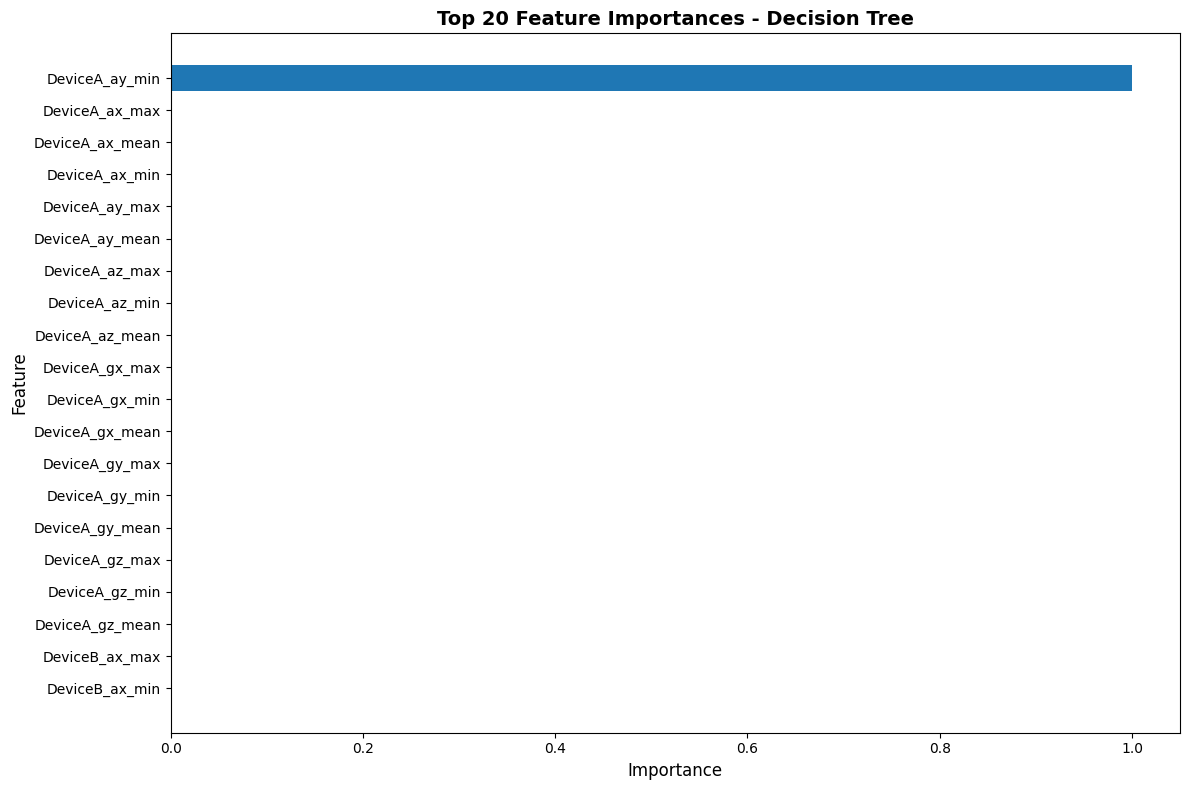

In [27]:
# Feature Importance Analysis using Decision Tree
import matplotlib.pyplot as plt

# Get feature importances from the trained model
feature_importances = model.feature_importances_
feature_names = cols

# Create a dataframe for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

print("Top 20 Most Important Features:")
print(importance_df.head(20))

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'].head(20), importance_df['Importance'].head(20))
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 20 Feature Importances - Decision Tree', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


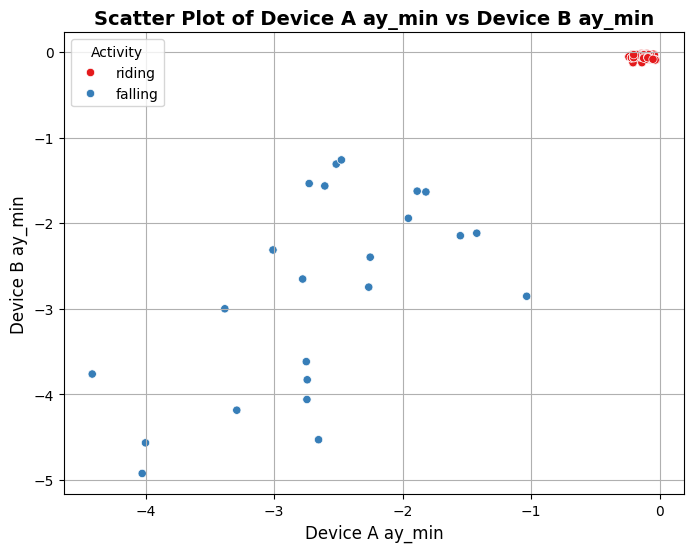

In [34]:
# take device A and device B aymin and label
import pandas as pd
X = df_final[['DeviceA_ay_min', 'DeviceB_ay_min']]
y = df_final['activity']

# scatter plot of X and give color based on label y
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x='DeviceA_ay_min', y='DeviceB_ay_min', hue=y, data=df_final, palette='Set1')
plt.title('Scatter Plot of Device A ay_min vs Device B ay_min', fontsize=14, fontweight='bold')
plt.xlabel('Device A ay_min', fontsize=12)
plt.ylabel('Device B ay_min', fontsize=12)
plt.legend(title='Activity')
plt.grid(True)
plt.show()


0       riding
1       riding
2       riding
3       riding
4       riding
        ...   
270    jerking
271    jerking
272    jerking
273    jerking
274    jerking
Name: activity, Length: 275, dtype: object


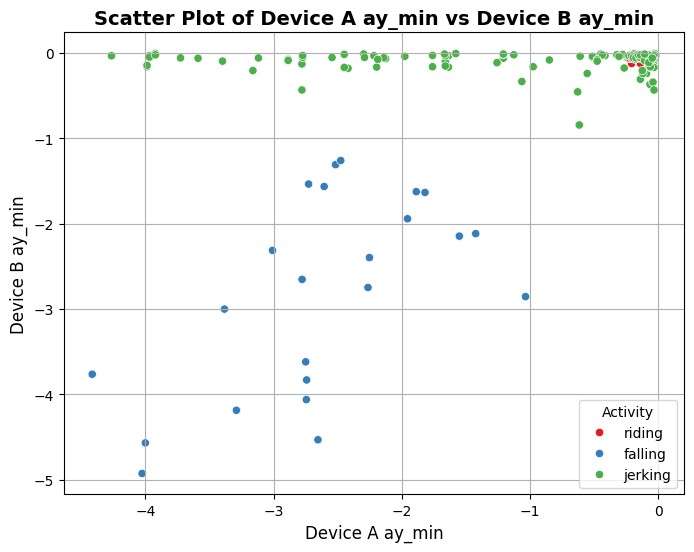

In [40]:
# read the data C:\Users\makumarm\Documents\ResearchWork\EdgeAI_IISC\Project\Hackthon\guardian-edge\Data\combined_final_data.csv
df_combined_all = pd.read_csv(r"C:\Users\makumarm\Documents\ResearchWork\EdgeAI_IISC\Project\Hackthon\guardian-edge\Data\combined_final_data.csv")

X = df_combined_all[['DeviceA_ay_min', 'DeviceB_ay_min']]
y = df_combined_all['activity']

print(y)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='DeviceA_ay_min', y='DeviceB_ay_min', hue=y, data=df_combined_all, palette='Set1')
plt.title('Scatter Plot of Device A ay_min vs Device B ay_min', fontsize=14, fontweight='bold')
plt.xlabel('Device A ay_min', fontsize=12)
plt.ylabel('Device B ay_min', fontsize=12)
plt.legend(title='Activity')
plt.grid(True)
plt.show()